In [60]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure 
import matplotlib.ticker as mtick
mpl.rc('font', family='Liberation Sans')
import seaborn as sns
import numpy as np

In [61]:
def plot_vg(path_to_data, path_to_wvar, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    wvar = pd.read_csv(path_to_wvar, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    bvar = differences.var(axis=1)
    total_var = pd.concat([wvar, bvar], axis=1).sum(axis=1)
    row_n = differences.count(axis=1)
    total_se = (total_var/row_n).apply(math.sqrt)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*total_se),
                 y2=differences.mean(axis=1) - (1.96*total_se),
                     color=colors[1], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine()

In [62]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    sd = differences.std(axis=1)
    row_n = differences.count(axis=1)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(sd/row_n.apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(sd/row_n.apply(math.sqrt))),
                     color=colors[1], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine()

/tmp/ipykernel_7230/1685128942.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_7230/1685128942.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_7230/1685128942.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_7230/1685128942.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_cs

year
-8.0    15.339760
-7.0    15.212858
-6.0    19.732733
-5.0    23.178643
-4.0    10.358032
-3.0    24.103768
-2.0    14.149156
-1.0    14.547908
 0.0   -33.750196
 1.0   -60.079663
 2.0   -86.775963
 3.0   -65.471736
 4.0   -77.013491
 5.0   -39.317295
 6.0   -57.596488
dtype: float64
year
-8.0    32.599854
-7.0    38.909559
-6.0     6.845821
-5.0    27.415676
-4.0    28.786394
-3.0    27.357345
-2.0    16.966062
-1.0    19.813477
 0.0   -11.904895
 1.0    -4.640161
 2.0   -18.659331
 3.0   -33.485843
 4.0   -13.710481
 5.0   -29.986947
 6.0   -10.861804
dtype: float64
year
-8.0    30.882290
-7.0    26.932541
-6.0    33.957372
-5.0    28.728837
-4.0    25.437700
-3.0    23.264874
-2.0     5.830350
-1.0     8.872137
 0.0    -6.528534
 1.0   -17.381770
 2.0   -11.909786
 3.0   -41.002068
 4.0   -84.987543
 5.0   -74.198575
 6.0   -99.767809
dtype: float64


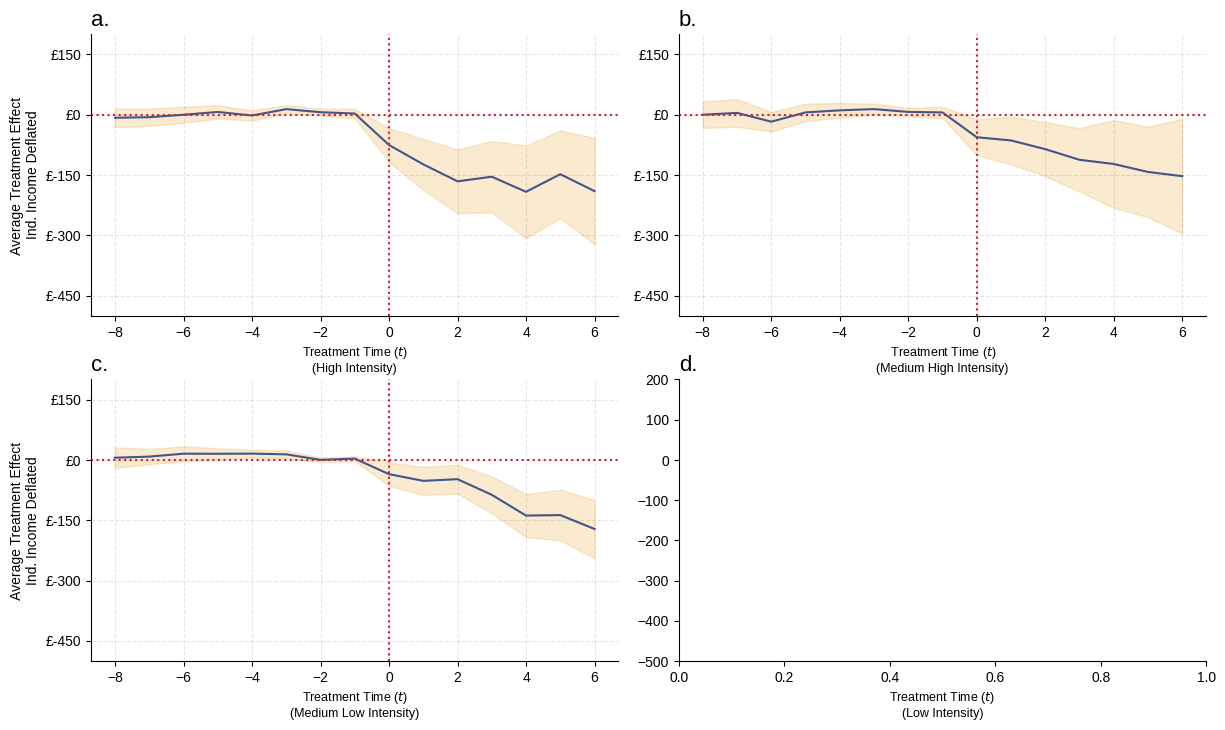

In [63]:
path1 = '../outputs/w_diffs_ind_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_ind_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_ind_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_ind_inc_deflated_li.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-500, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
#plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_7230/2331036312.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_7230/2331036312.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  wvar = pd.read_csv(path_to_wvar, index_col=0)[-8:6]
/tmp/ipykernel_7230/2331036312.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_7230/2331036312.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_

year
-8.0    19.108368
-7.0    17.112562
-6.0    20.870849
-5.0    24.145677
-4.0    11.442097
-3.0    24.862401
-2.0    15.097915
-1.0    15.083728
 0.0   -31.648384
 1.0   -57.850339
 2.0   -84.377843
 3.0   -62.520061
 4.0   -73.045714
 5.0   -33.195336
 6.0   -50.042809
dtype: float64
year
-8.0    35.012175
-7.0    40.988652
-6.0     8.696591
-5.0    28.857252
-4.0    29.851897
-3.0    28.394794
-2.0    17.948890
-1.0    20.508795
 0.0   -10.075522
 1.0    -2.608367
 2.0   -15.879450
 3.0   -29.743781
 4.0   -10.390170
 5.0   -24.976261
 6.0    -5.358845
dtype: float64
year
-8.0    32.576788
-7.0    28.184708
-6.0    34.831188
-5.0    29.425658
-4.0    26.073871
-3.0    23.706459
-2.0     6.319847
-1.0     9.380989
 0.0    -5.591881
 1.0   -16.169535
 2.0   -10.293499
 3.0   -39.288024
 4.0   -82.861452
 5.0   -71.713958
 6.0   -96.867458
dtype: float64


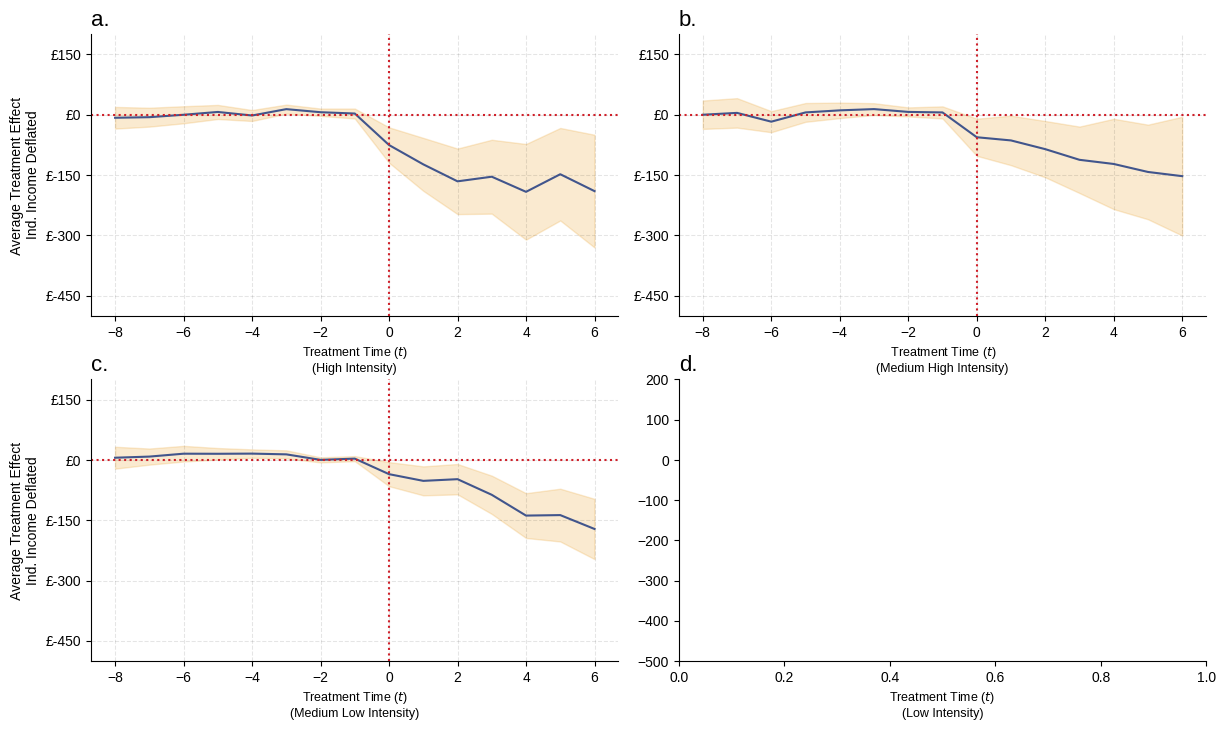

In [64]:
path1 = '../outputs/w_diffs_ind_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_ind_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_ind_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_ind_inc_deflated_li.csv'

varpath1 = '../outputs/boots_vars_ind_inc_deflated_hi.csv'
varpath2 = '../outputs/boots_vars_ind_inc_deflated_mhi.csv'
varpath3 = '../outputs/boots_vars_ind_inc_deflated_mli.csv'
varpath4 = '../outputs/boots_vars_ind_inc_deflated_li.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-500, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot_vg(path1,varpath1, ax1)
plot_vg(path2,varpath2, ax2)
plot_vg(path3,varpath3, ax3)
#plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_18167/953915249.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_18167/953915249.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_18167/953915249.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_18167/953915249.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_cs

(15, 224)
(15, 927)
(15, 1010)


/tmp/ipykernel_18167/953915249.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 6361)


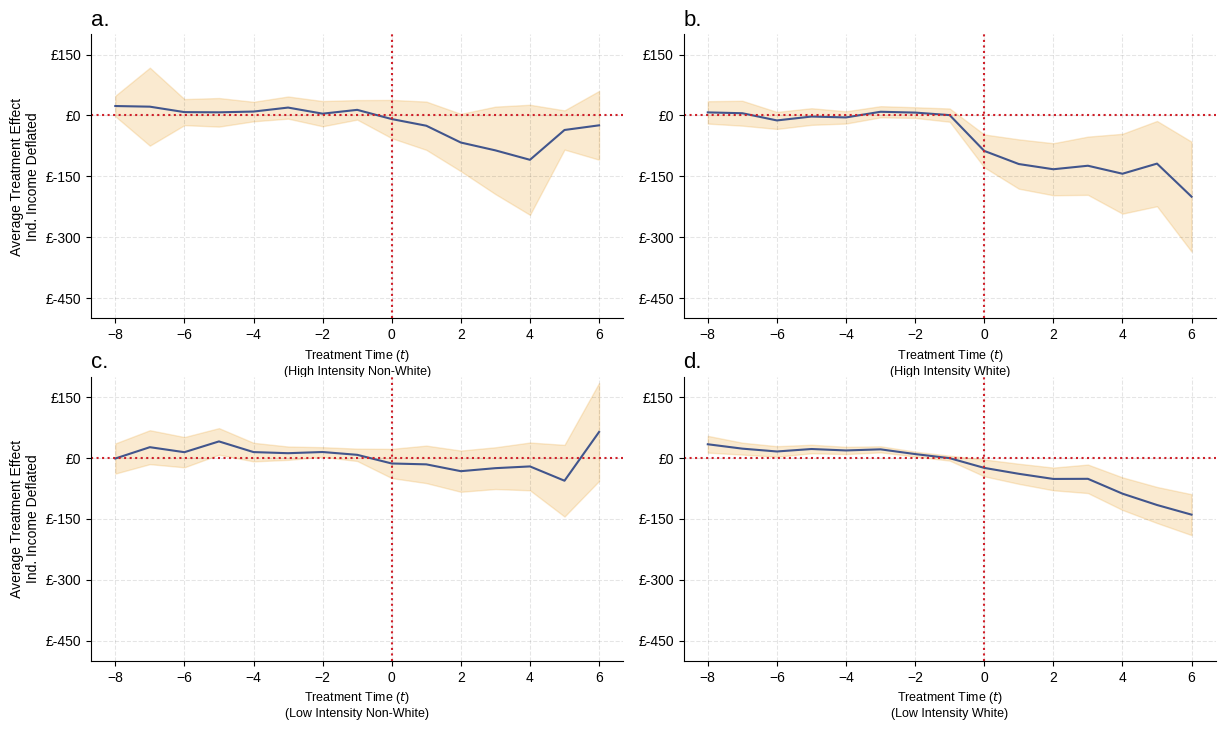

In [4]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    print(differences.shape)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color=colors[1], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine() 

path1 = '../outputs/w_diffs_ind_inc_deflated_high_nw.csv'
path2 = '../outputs/w_diffs_ind_inc_deflated_high_w.csv'
path3 = '../outputs/w_diffs_ind_inc_deflated_low_nw.csv'
path4 = '../outputs/w_diffs_ind_inc_deflated_low_w.csv'

varname = 'Ind. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-500, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity Non-White)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(High Intensity White)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Low Intensity Non-White)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity White)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_25737/1296066603.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_25737/1296066603.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_25737/1296066603.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_25737/1296066603.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.rea

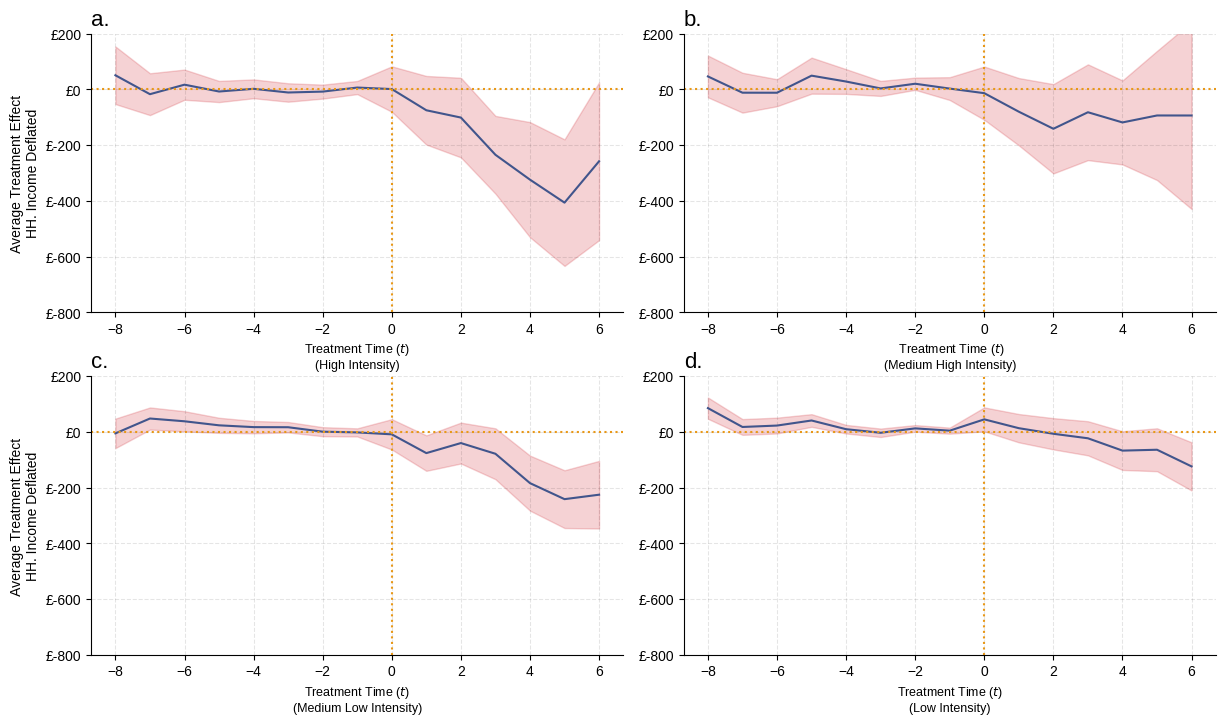

In [4]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[0], ax=ax)
    ax.axvline(x=0, linestyle='dotted', color=colors[1])
    ax.axhline(y=0, linestyle='dotted', color=colors[1])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color=colors[2], alpha=0.2)
    ax.yaxis.set_major_formatter('£{x:1.0f}')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine() 

path1 = '../outputs/w_diffs_hh_inc_deflated_hi.csv'
path2 = '../outputs/w_diffs_hh_inc_deflated_mhi.csv'
path3 = '../outputs/w_diffs_hh_inc_deflated_mli.csv'
path4 = '../outputs/w_diffs_hh_inc_deflated_li.csv'

varname = 'HH. Income Deflated'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-800, 200)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_25737/1483753177.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
/tmp/ipykernel_25737/1483753177.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_25737/1483753177.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 497)
(15, 617)


/tmp/ipykernel_25737/1483753177.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 2354)


/tmp/ipykernel_25737/1483753177.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv(path_to_data, index_col=0)[-8:6]


(15, 4615)


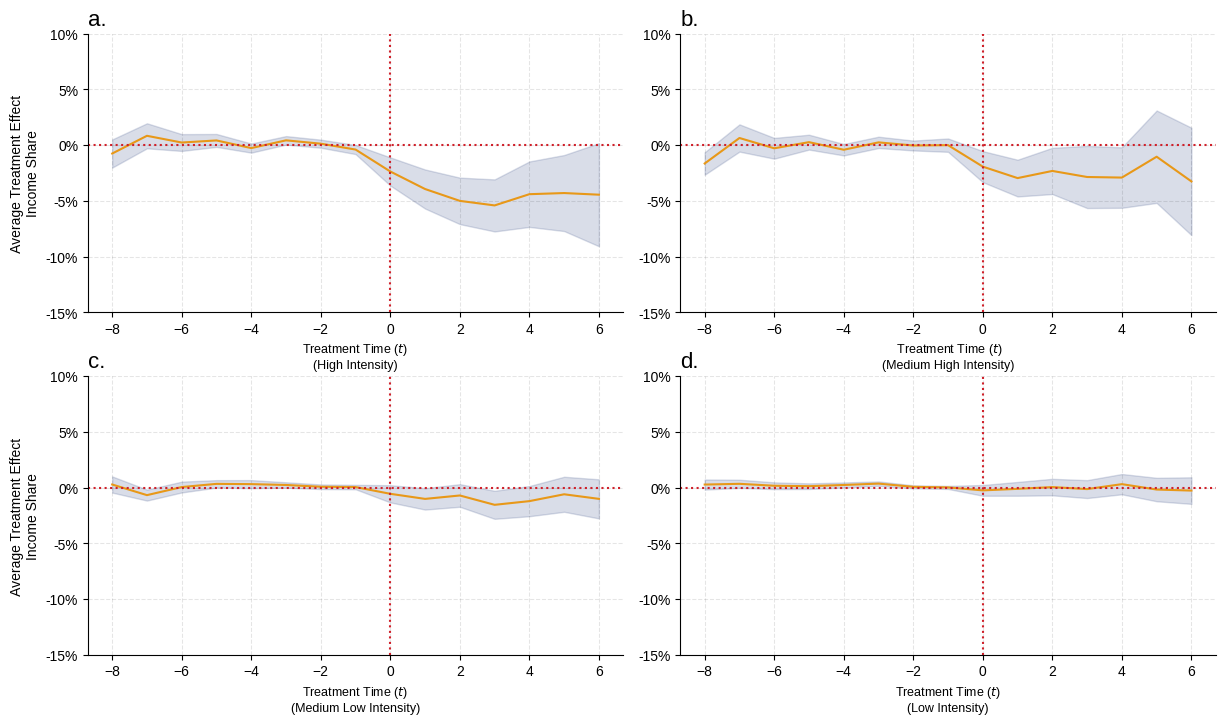

In [10]:
def plot(path_to_data, ax):
    colors =  ['#41558c', '#E89818', '#CF202A']
    differences = pd.read_csv(path_to_data, index_col=0)[-8:6]
    differences.mean(axis=1).plot(color=colors[1], ax=ax)
    print(differences.shape)
    ax.axvline(x=0, linestyle='dotted', color=colors[2])
    ax.axhline(y=0, linestyle='dotted', color=colors[2])
    ax.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color=colors[0], alpha=0.2)
    ax.yaxis.set_major_formatter('{x:1.0f}%')
    ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    plt.tight_layout()
    sns.despine() 

path1 = '../outputs/w_diffs_inc_share_hi.csv'
path2 = '../outputs/w_diffs_inc_share_mhi.csv'
path3 = '../outputs/w_diffs_inc_share_mli.csv'
path4 = '../outputs/w_diffs_inc_share_li.csv'

varname = 'Income Share'
mpl.rc('font', family='Liberation Sans')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 7),
                        layout="constrained")
custom_ylim = (-15, 10)
plt.setp(((ax1, ax2), (ax3, ax4)), ylim=custom_ylim)
plot(path1, ax1)
plot(path2, ax2)
plot(path3, ax3)
plot(path4, ax4)
ax1.set_ylabel(' Average Treatment Effect \n' + varname)
ax3.set_ylabel(' Average Treatment Effect \n' + varname)
ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)
min_y = 0
max_y = 0
for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
    ax.set_title(letter, loc='left', fontsize=16)

/tmp/ipykernel_5643/467892157.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv('./robust_test/synths_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]
/tmp/ipykernel_5643/467892157.py:12: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  differences = pd.read_csv('./robust_test/treats_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]


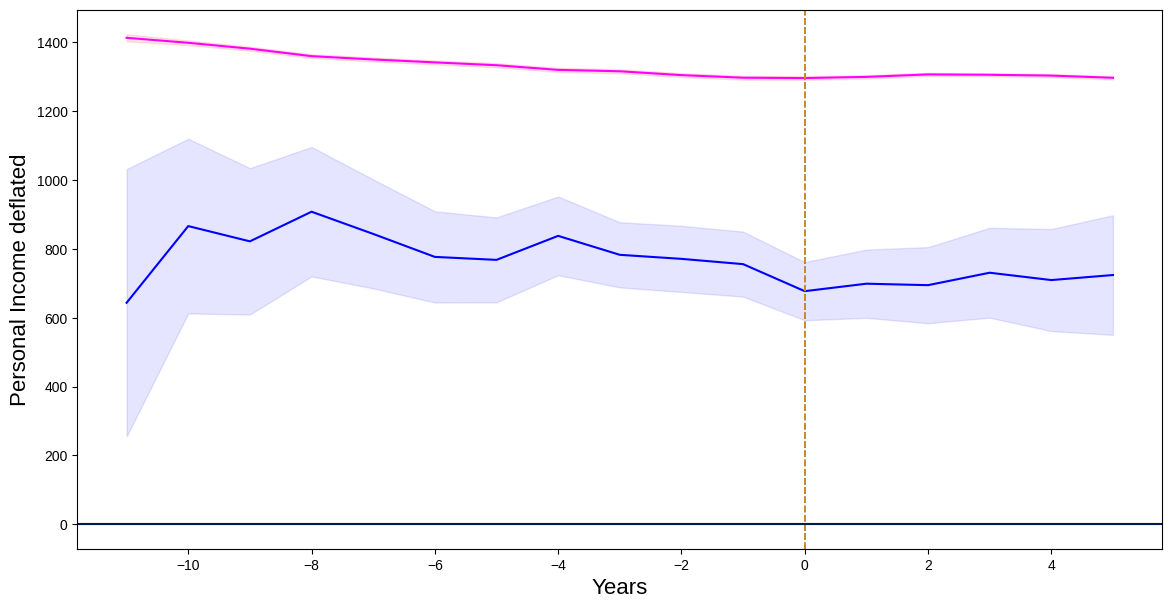

In [25]:
mpl.rc('font', family='Liberation Sans')

figure(figsize=(14, 7))
differences = pd.read_csv('./robust_test/synths_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]
ax = differences.mean(axis=1).plot(color='magenta')
plt.axvline(x=0, linestyle='--', color='#001c54', alpha=1, linewidth=1.25)
plt.axhline(y=0, color='#E89818', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='red', alpha=0.1)
differences = pd.read_csv('./robust_test/treats_ind_inc_deflated_mhi_dnd.csv', index_col=0)[:5]
ax = differences.mean(axis=1).plot(color='blue')
plt.axvline(x=0, linestyle='--', color='#E89818', alpha=1, linewidth=1.25)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Personal Income deflated', fontsize=16)
plt.axhline(y=0, color='#001c54', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='blue', alpha=0.1)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()